In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def setting(file_name):
    df = pd.read_csv(file_name)
    for i in df.index:
        df.loc[i, 'Hours'] = int(df.loc[i, 'time'][0:2]) + int(df.loc[i, 'time'][3:5])/60
    dfx = df.set_index('id')
    return(dfx)


def parking_plot(parking_id, df, title, max_y=None, x_range=None, fig_size=(20,10),
                 color_total='#2980B9', color_available='#EAF2F8', show_total=True, show_available=True):
    """
    Generic parking plot function.
    
    Parameters:
    - parking_id: the index in df to plot
    - df: dataframe with 'Hours', 'totalcar', 'availablecar'
    - title: plot title and output filename
    - max_y: maximum y-axis value
    - x_range: tuple for x-axis limits
    - fig_size: figure size
    - color_total: color for total cars
    - color_available: color for available cars
    - show_total: whether to plot total cars
    - show_available: whether to plot available cars
    """
    df0 = df.loc[parking_id]
    x = list(df0['Hours'])
    y_total = list(df0['totalcar'])
    y_available = list(df0['availablecar'])
    
    plt.figure(figsize=fig_size)
    plt.title(title)
    if x_range: plt.xlim(*x_range)
    if max_y: plt.ylim(0, max_y)
    plt.grid(True)
    
    if show_total:
        p1 = sns.lineplot(x=x, y=y_total, color=color_total)
        p1.fill_between(x, y_total, color=color_total, alpha=1)
    if show_available:
        p2 = sns.lineplot(x=x, y=y_available, color=color_available)
        p2.fill_between(x, y_available, color=color_available, alpha=0.4)
        sns.scatterplot(x=x, y=y_available, color=color_available)
    
    plt.savefig(f"{title}.png")
    plt.show()
    

def parking_plot_auto(parking_id, df, title, long_hours=False):
    """
    Automatically select plot parameters based on parking size.
    """
    total_cars = df.loc[parking_id, 'totalcar'].iloc[0]  # first value
    if total_cars > 500:
        max_y = 2500
        color_total = '#154360'
    elif total_cars > 250:
        max_y = 400
        color_total = '#1F618D'
    elif total_cars > 50:
        max_y = 250
        color_total = '#2980B9'
    else:
        max_y = 50
        color_total = '#7FB3D5'
    
    x_range = (0, 24) if long_hours else (8, 22)
    fig_size = (20,10) if not long_hours else (20,8)
    
    parking_plot(
        parking_id, df, title,
        max_y=max_y,
        x_range=x_range,
        fig_size=fig_size,
        color_total=color_total
    )

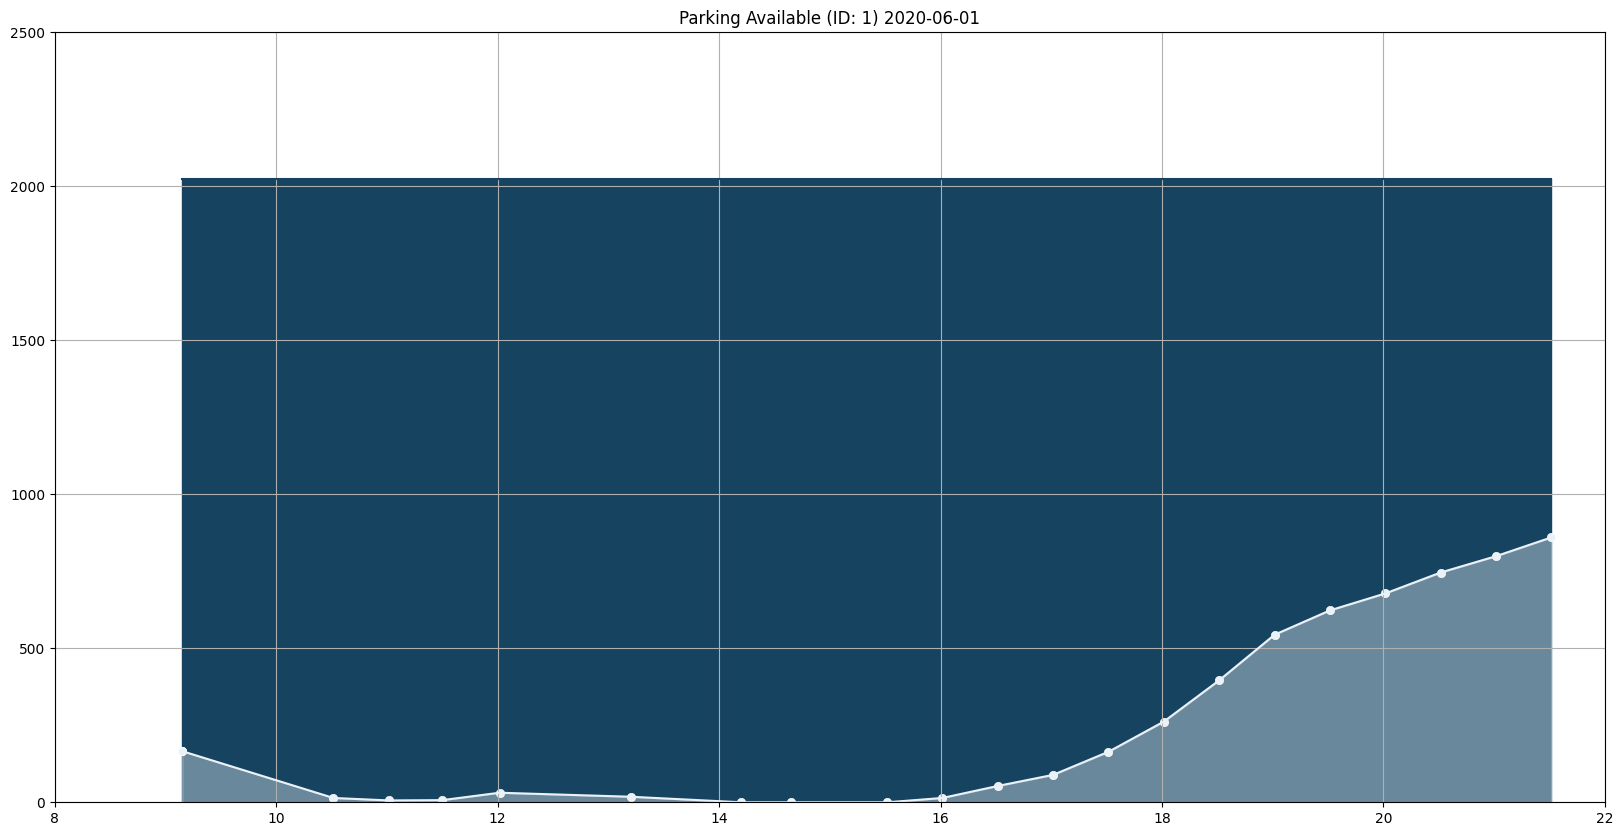

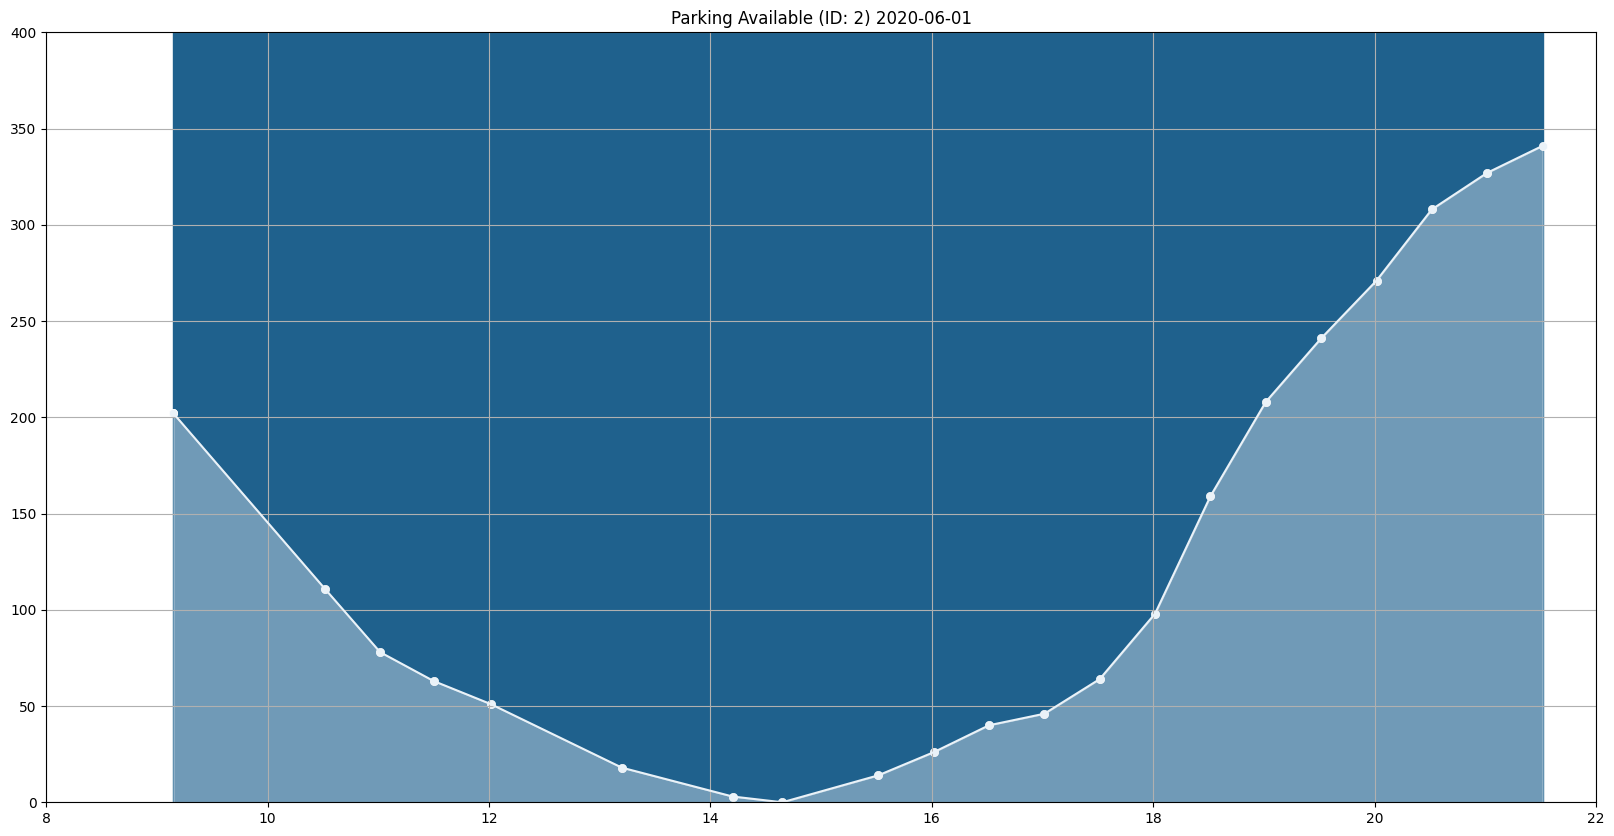

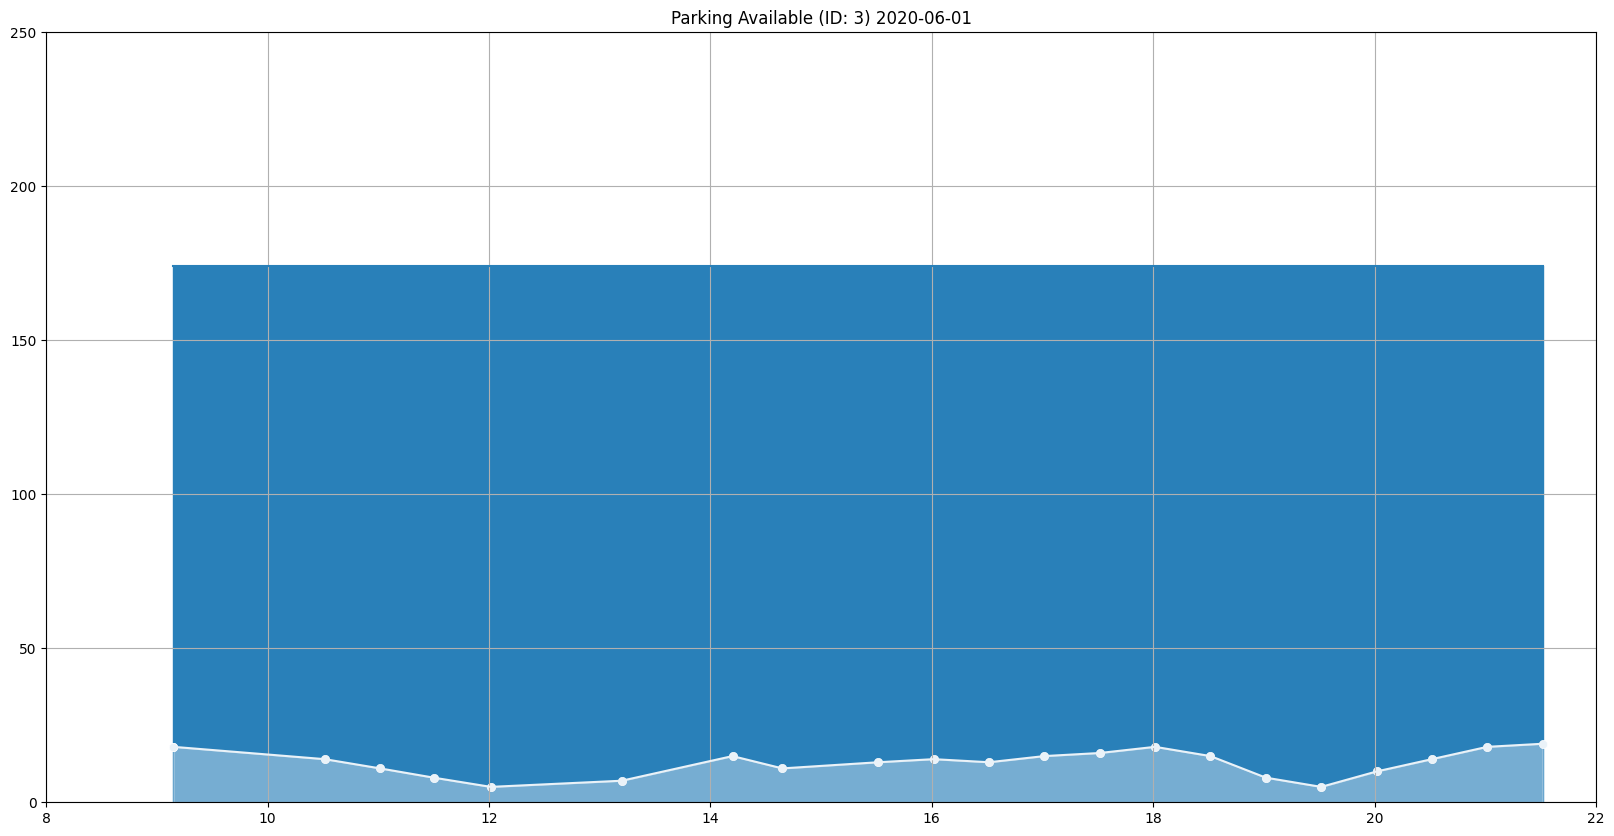

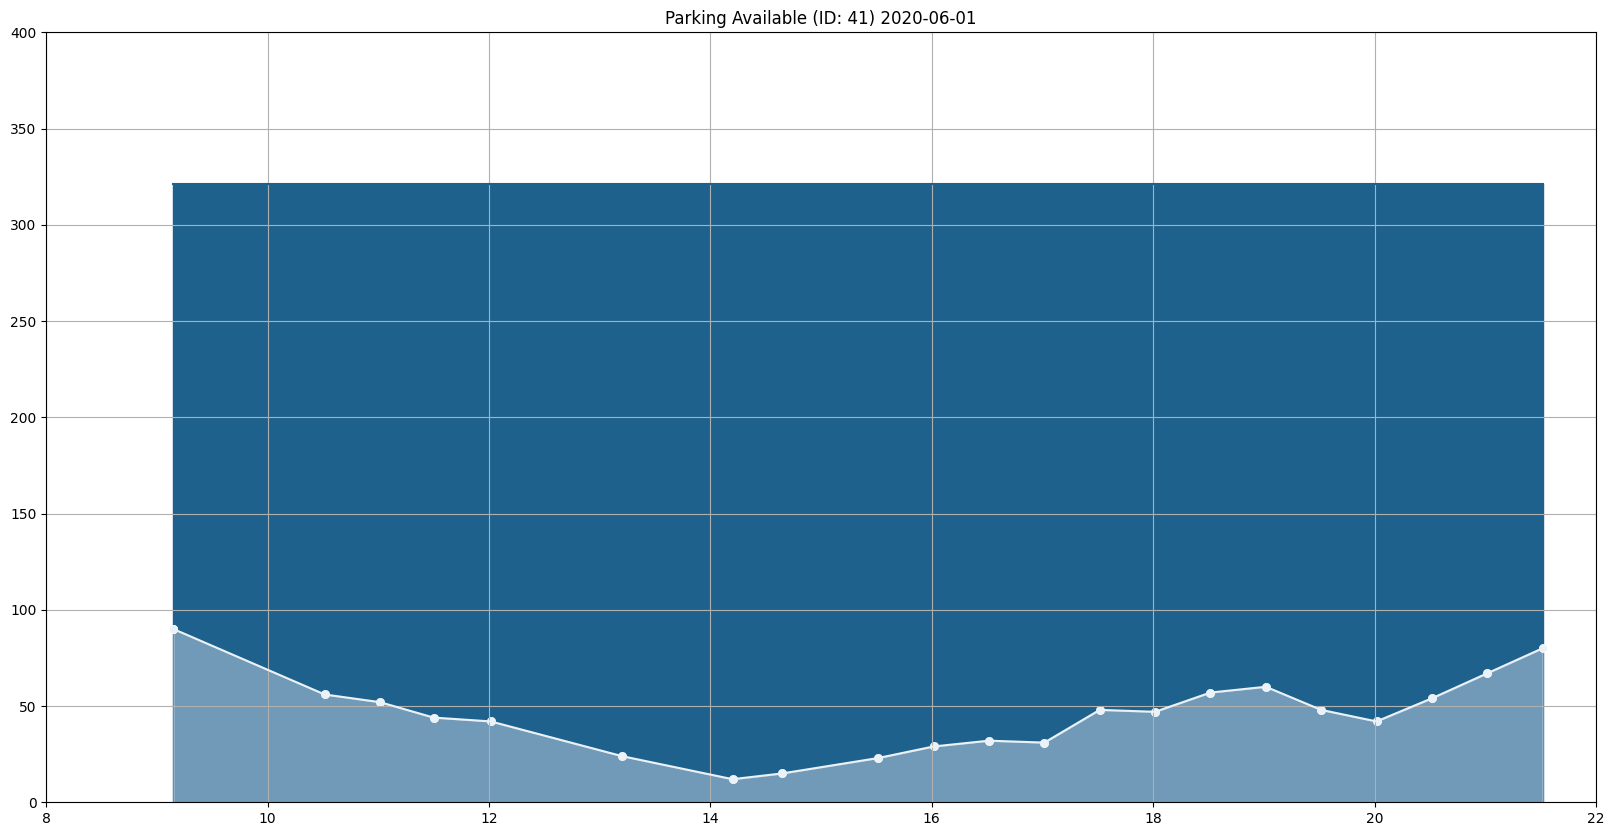

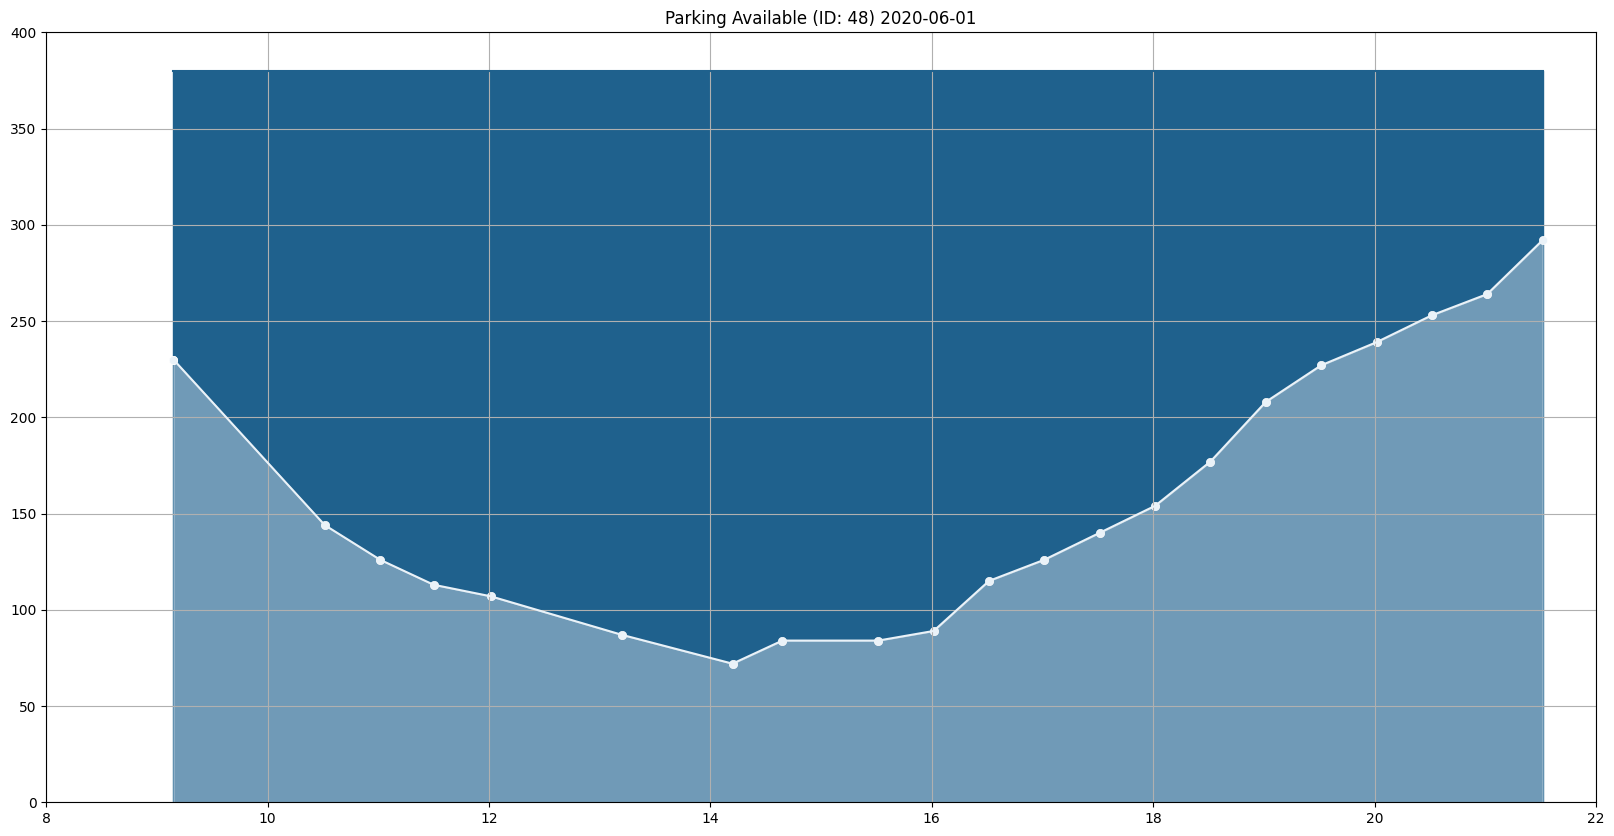

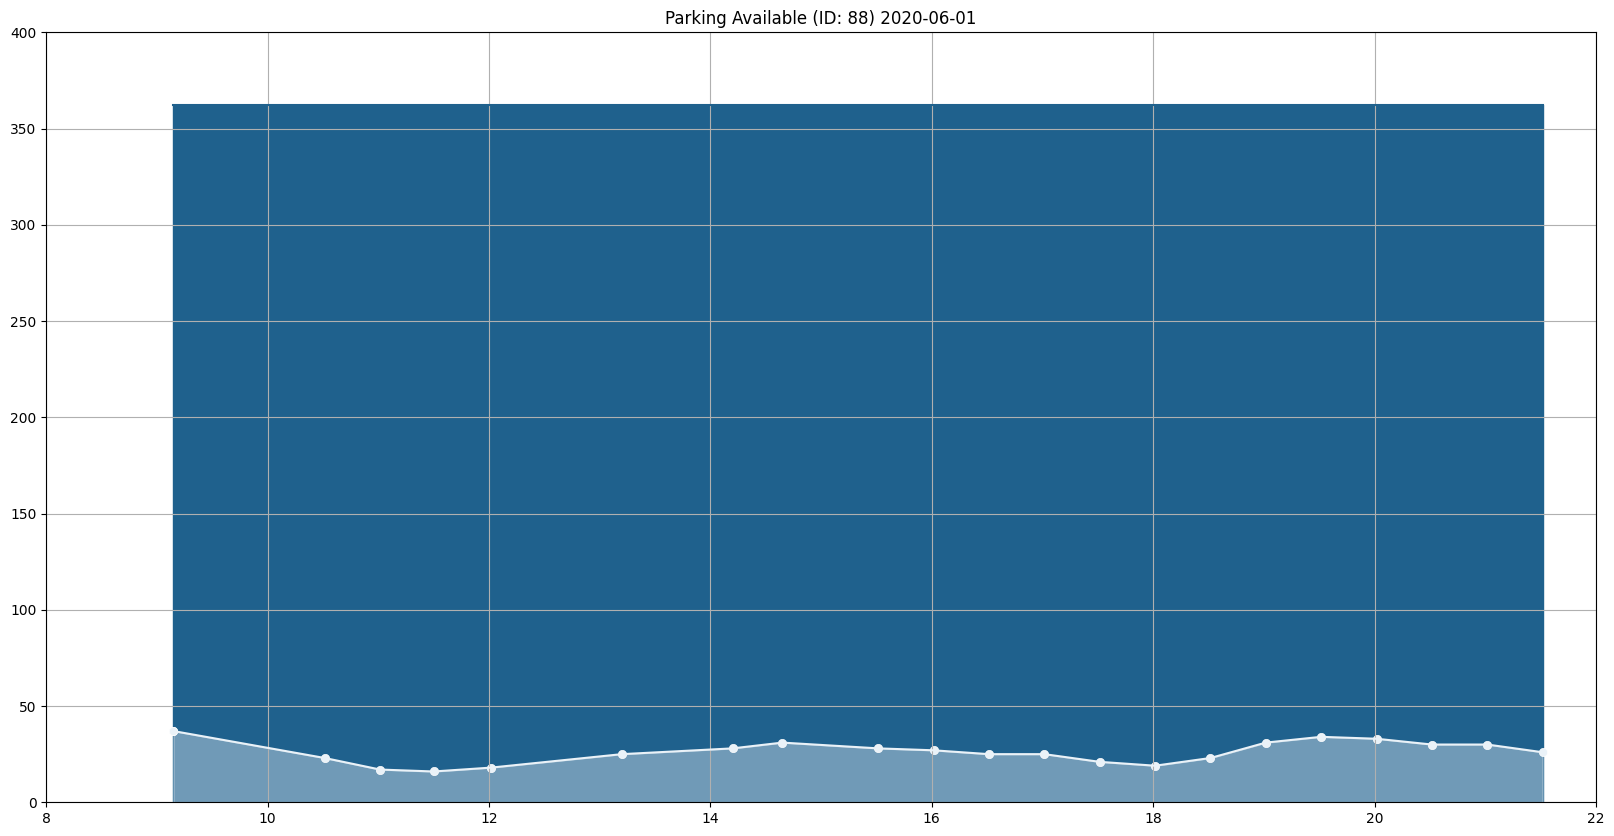

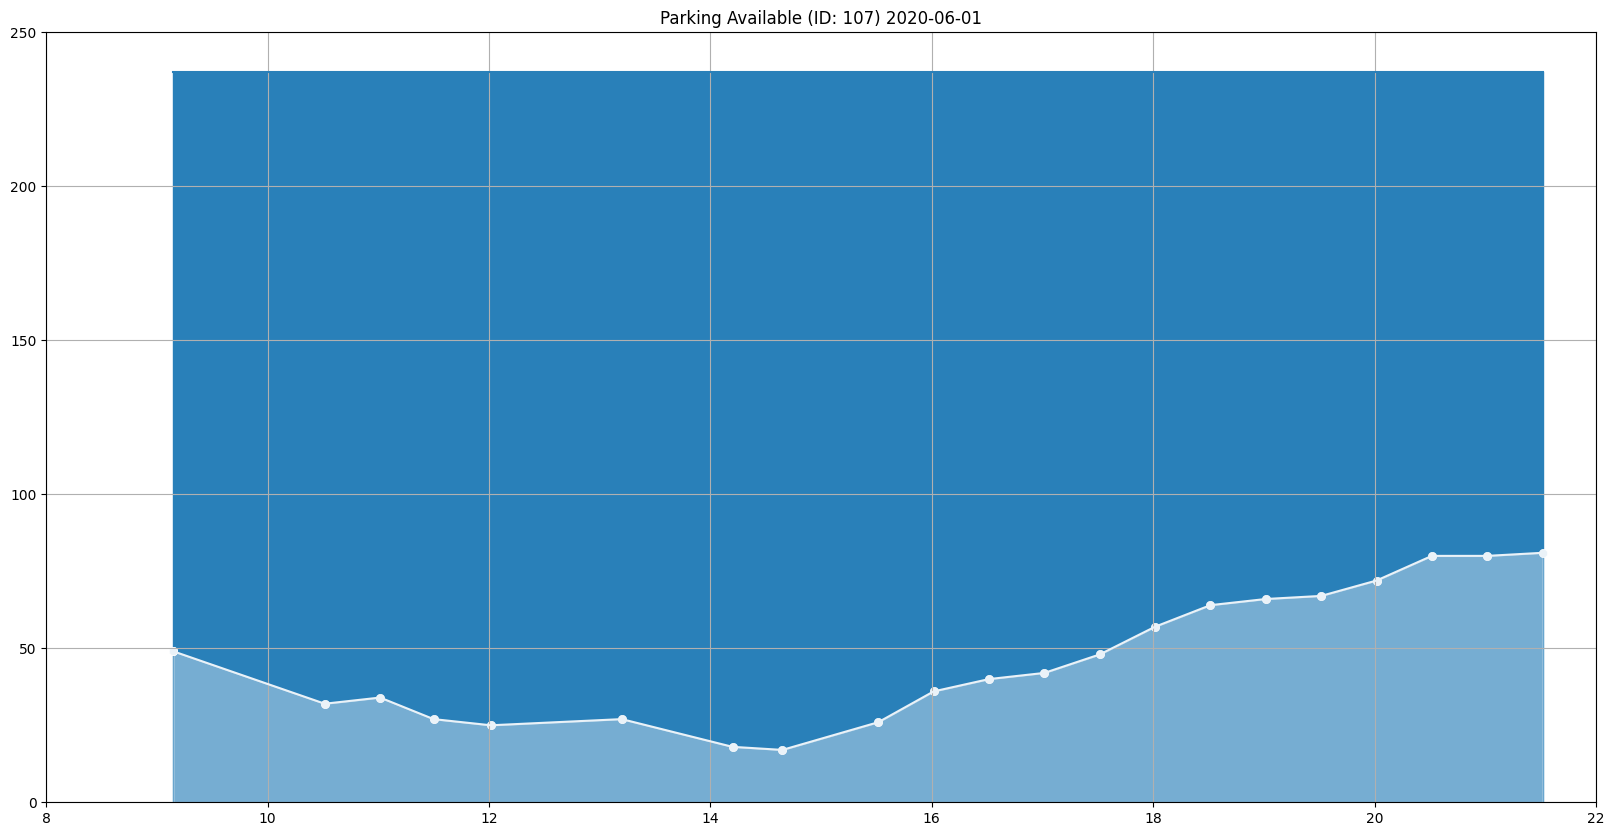

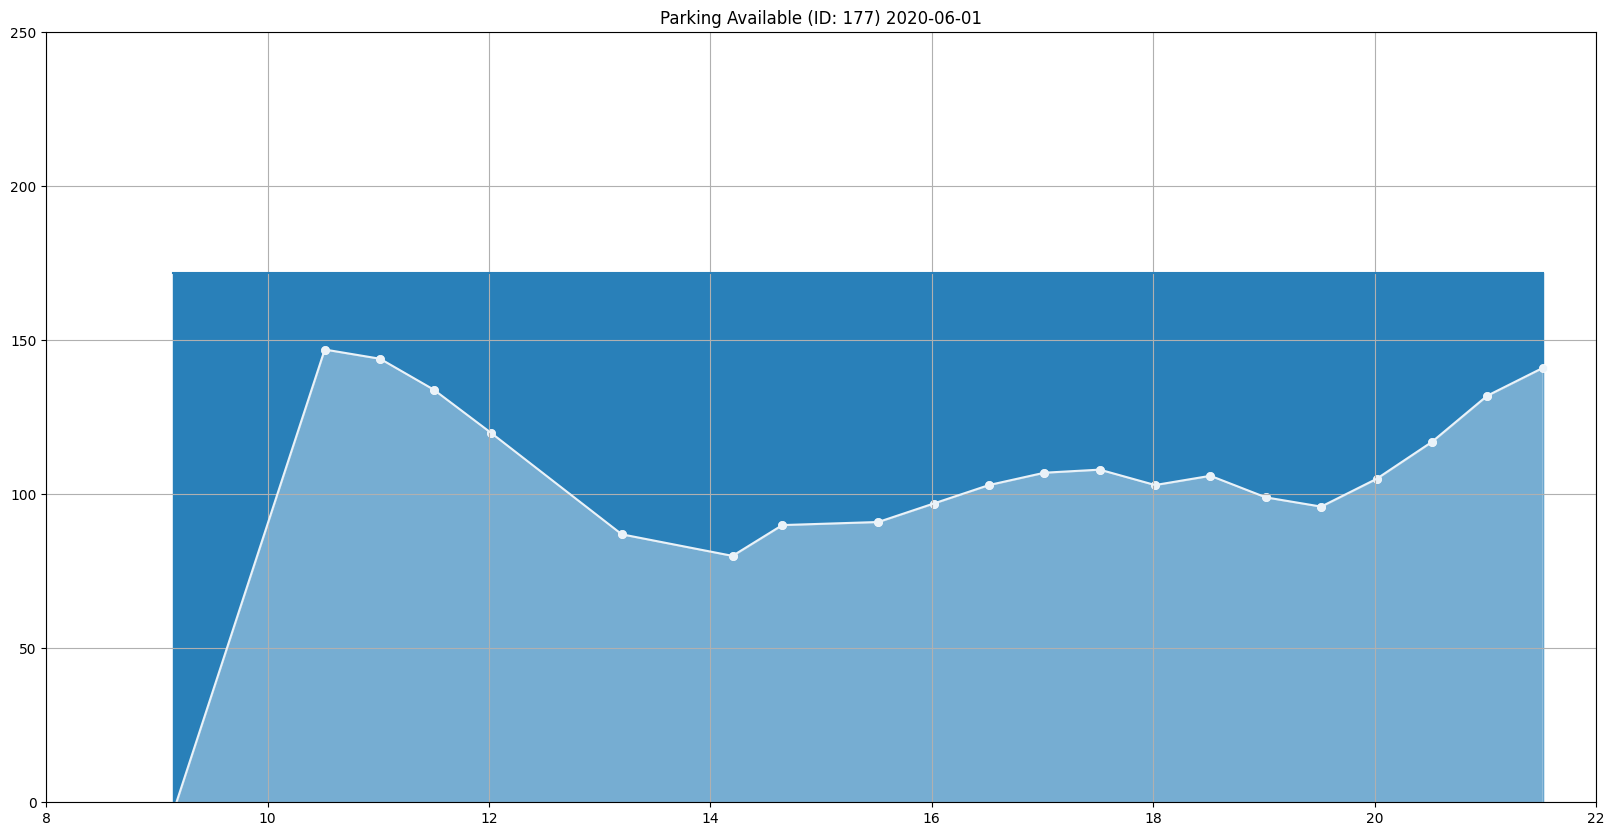

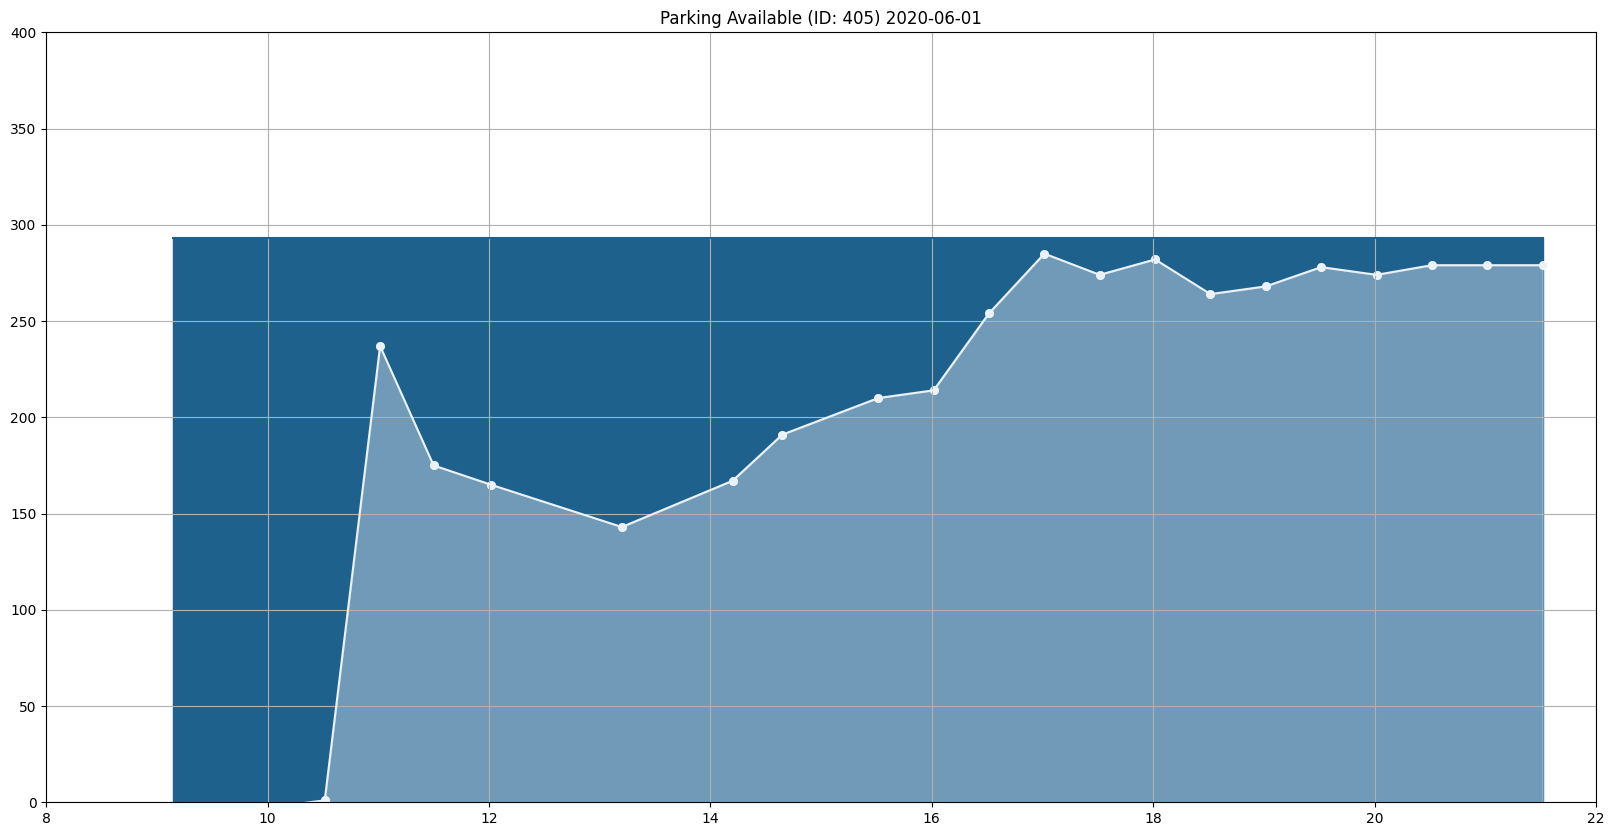

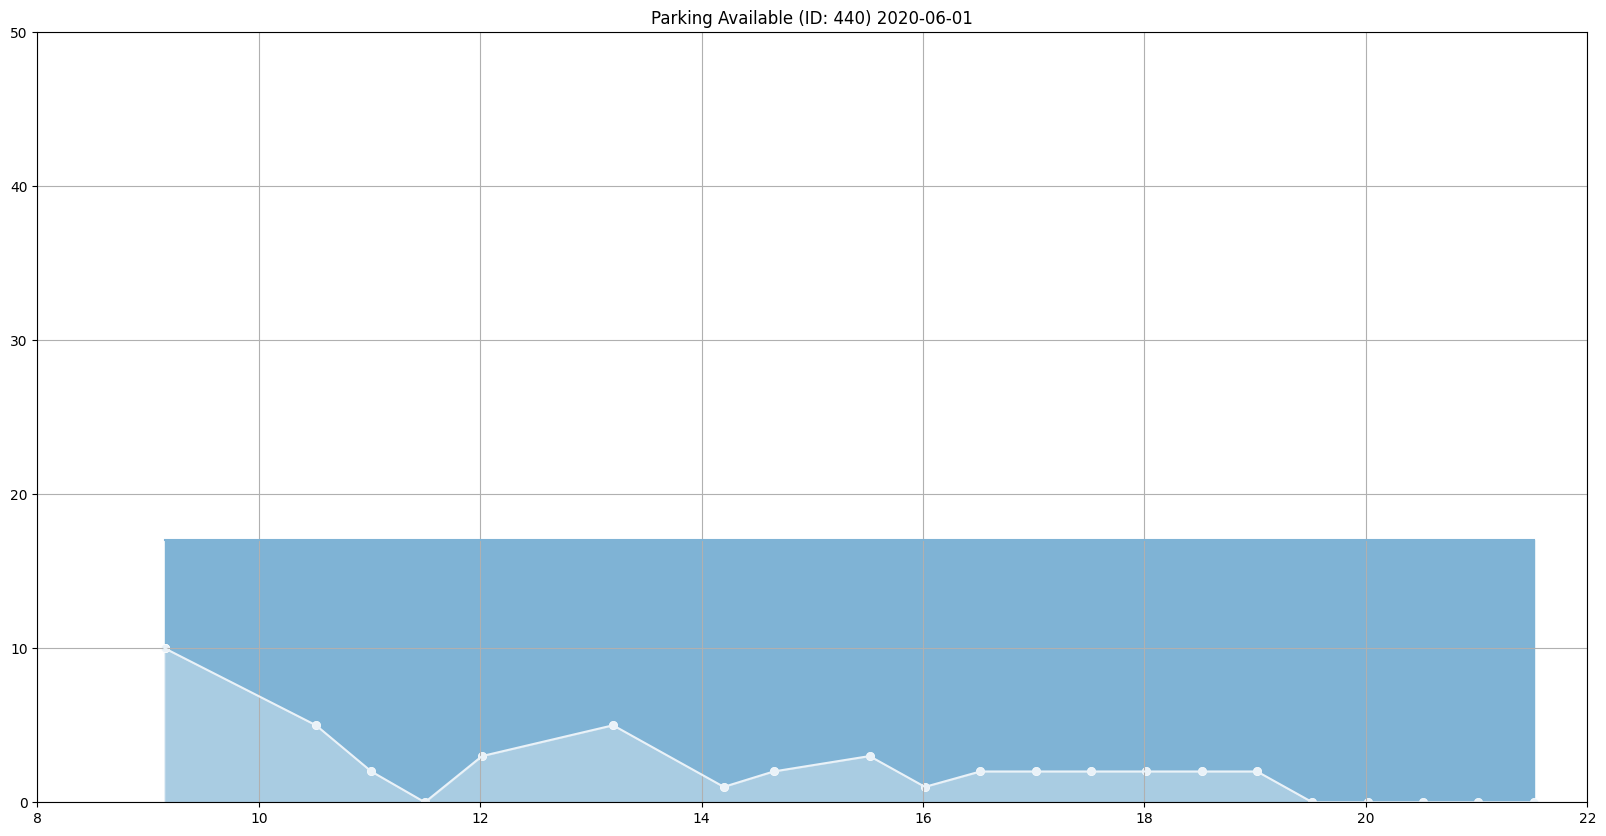

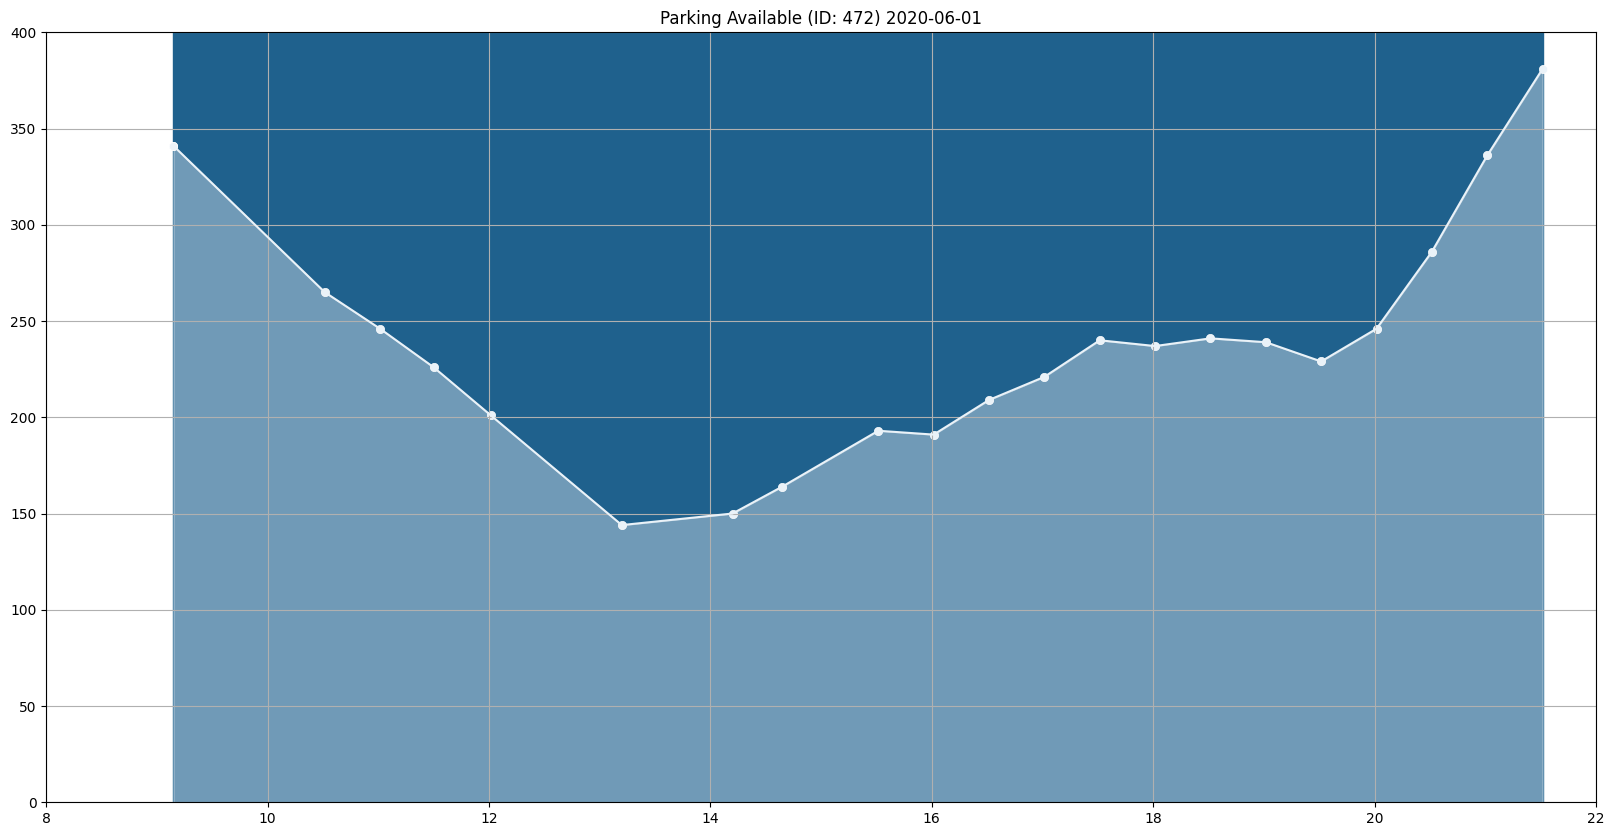

In [2]:
dfx = setting('Parking_csv/TCmSV_06-01.csv')
parking_plot_auto(1, dfx, 'Parking Available (ID: 1) 2020-06-01')
parking_plot_auto(2, dfx, 'Parking Available (ID: 2) 2020-06-01')
parking_plot_auto(3, dfx, 'Parking Available (ID: 3) 2020-06-01')
parking_plot_auto(41, dfx, 'Parking Available (ID: 41) 2020-06-01')
parking_plot_auto(48, dfx, 'Parking Available (ID: 48) 2020-06-01')
parking_plot_auto(88, dfx, 'Parking Available (ID: 88) 2020-06-01')
parking_plot_auto(107, dfx, 'Parking Available (ID: 107) 2020-06-01')
parking_plot_auto(177, dfx, 'Parking Available (ID: 177) 2020-06-01')
parking_plot_auto(405, dfx, 'Parking Available (ID: 405) 2020-06-01')
parking_plot_auto(440, dfx, 'Parking Available (ID: 440) 2020-06-01')
parking_plot_auto(472, dfx, 'Parking Available (ID: 472) 2020-06-01')